In [ ]:
import os
import cv2
import json
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# input_shape = (128, 128, 3)
data_dir = '/content/drive/MyDrive/datasetv'

real_data = [f for f in os.listdir(data_dir+'/real') if f.endswith('.png')]
fake_data = [f for f in os.listdir(data_dir+'/fake') if f.endswith('.png')]

X = []
Y = []

for img in real_data:
    X.append(img_to_array(load_img(data_dir+'/real/'+img)).flatten() / 255.0)
    Y.append(1)
for img in fake_data:
    X.append(img_to_array(load_img(data_dir+'/fake/'+img)).flatten() / 255.0)
    Y.append(0)

Y_val_org = Y

#Normalization
X = np.array(X)
Y = to_categorical(Y, 2)

#Reshape
X = X.reshape(-1, 128, 128, 3)

#Train-Test split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y_val_org, test_size = 0.2, random_state=5)


In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y_val_org, test_size = 0.2, random_state=5)


In [ ]:
from keras.layers import Input, Conv2D, BatchNormalization, AveragePooling2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Dense, LeakyReLU
from keras.models import Model

# Define parameters
activation = 'relu'
padding = 'same'
droprate = 0.5
epsilon = 0.001

# Define the input shape based on the expected resolution
input_shape = (None, None, 3)

# Input layer
inputs = Input(shape=input_shape)

# Convolutional layers
x = Conv2D(filters=8, kernel_size=3, activation=activation, padding=padding)(inputs)
x = BatchNormalization(epsilon=epsilon)(x)
x = Conv2D(filters=16, kernel_size=3, activation=activation, padding=padding)(x)
x = Conv2D(filters=16, kernel_size=3, activation=activation, padding=padding)(x)
x = BatchNormalization(epsilon=epsilon)(x)
x = AveragePooling2D(pool_size=2)(x)

x = Conv2D(filters=32, kernel_size=3, activation=activation, padding=padding)(x)
x = Conv2D(filters=32, kernel_size=3, activation=activation, padding=padding)(x)
x = Conv2D(filters=32, kernel_size=3, activation=activation, padding=padding)(x)
x = BatchNormalization(epsilon=epsilon)(x)
x = AveragePooling2D(pool_size=2)(x)

x = Conv2D(filters=64, kernel_size=3, activation=activation, padding=padding)(x)
x = Conv2D(filters=64, kernel_size=3, activation=activation, padding=padding)(x)
x = Conv2D(filters=64, kernel_size=3, activation=activation, padding=padding)(x)
x = Conv2D(filters=64, kernel_size=3, activation=activation, padding=padding)(x)
x = BatchNormalization(epsilon=epsilon)(x)
x = AveragePooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=3, activation=activation, padding=padding)(x)
x = BatchNormalization(epsilon=epsilon)(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=256, kernel_size=3, activation=activation, padding=padding)(x)
x = BatchNormalization(epsilon=epsilon)(x)
x = MaxPooling2D(pool_size=2)(x)

# Global Average Pooling
x = GlobalAveragePooling2D()(x)

# Fully connected layers
x = Dropout(droprate)(x)
x = Dense(32, kernel_initializer='glorot_normal', activation='relu')(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dropout(droprate)(x)
x = Dense(16, kernel_initializer='glorot_normal', activation='relu')(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dropout(droprate)(x)
outputs = Dense(2, kernel_initializer='glorot_normal', activation='sigmoid')(x)

# Create model
model2 = Model(inputs=inputs, outputs=outputs)
model2.summary()
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv2d_24 (Conv2D)          (None, None, None, 8)     224       
                                                                 
 batch_normalization_12 (Ba  (None, None, None, 8)     32        
 tchNormalization)                                               
                                                                 
 conv2d_25 (Conv2D)          (None, None, None, 16)    1168      
                                                                 
 conv2d_26 (Conv2D)          (None, None, None, 16)    2320      
                                                                 
 batch_normalization_13 (Ba  (None, None, None, 16)    64        
 tchNormalization)                                         

In [ ]:
EPOCHS = 20
history = model2.fit(X_train, Y_train, epochs = EPOCHS, validation_data = (X_val, Y_val), verbose = 1)

Epoch 1/20
73/73 [==============================] - 193s 3s/step - loss: 0.7843 - accuracy: 0.6173 - val_loss: 0.6999 - val_accuracy: 0.5078
Epoch 2/20
73/73 [==============================] - 184s 3s/step - loss: 0.6500 - accuracy: 0.6541 - val_loss: 0.7523 - val_accuracy: 0.4991
Epoch 3/20
73/73 [==============================] - 169s 2s/step - loss: 0.5236 - accuracy: 0.7573 - val_loss: 1.5396 - val_accuracy: 0.4922
Epoch 4/20
73/73 [==============================] - 171s 2s/step - loss: 0.5248 - accuracy: 0.7846 - val_loss: 2.0541 - val_accuracy: 0.5061
Epoch 5/20
73/73 [==============================] - 171s 2s/step - loss: 0.4460 - accuracy: 0.8392 - val_loss: 1.9553 - val_accuracy: 0.5009
Epoch 6/20
73/73 [==============================] - 170s 2s/step - loss: 0.4388 - accuracy: 0.8318 - val_loss: 2.6134 - val_accuracy: 0.5563
Epoch 7/20
73/73 [==============================] - 180s 2s/step - loss: 0.3838 - accuracy: 0.8756 - val_loss: 0.6470 - val_accuracy: 0.8024
Epoch 8/20
73

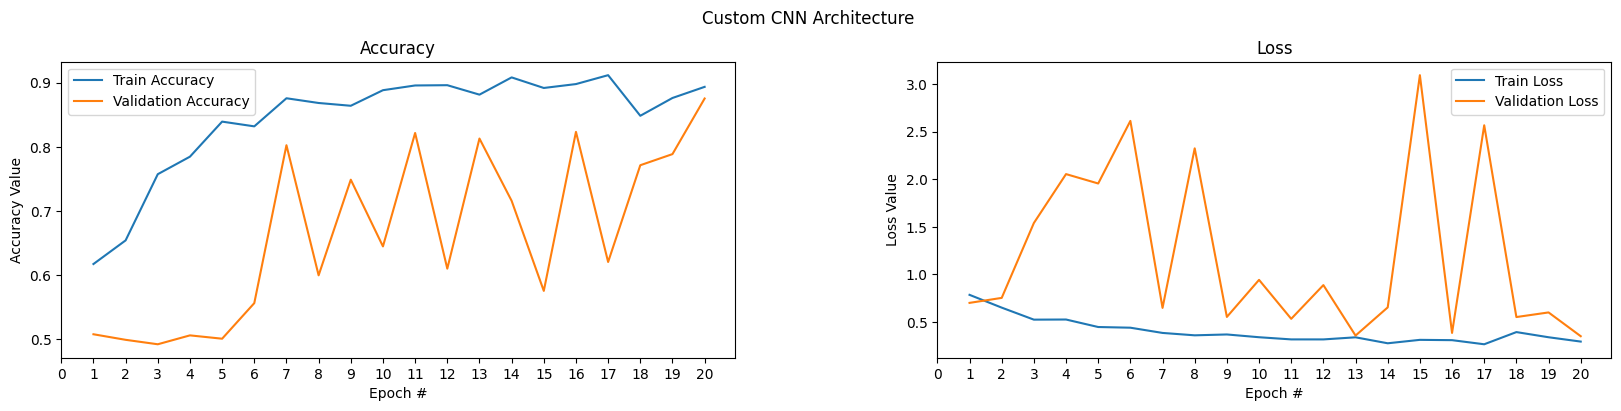

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
t = f.suptitle('Custom CNN Architecture ', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,EPOCHS+1))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, EPOCHS+1, 1))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch #')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, EPOCHS+1, 1))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch #')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
# Ensure both y_true and y_pred are binary
y_true_binary = Y_val_org_np.ravel()
y_pred_binary = np.argmax(model2.predict(X), axis=1)

# Call the confusion_matrix function with the binary targets
cm = confusion_matrix(y_true_binary, y_pred_binary)

# Continue with the rest of the code...

91/91 [==============================] - 57s 625ms/step


True positive =  1383
False positive =  96
False negative =  191
True negative =  1214




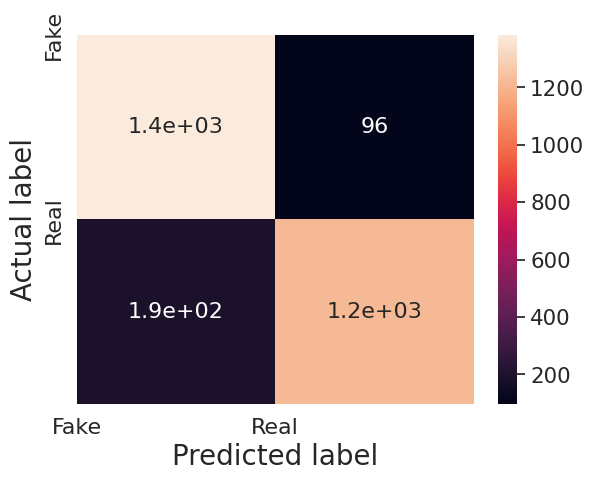

In [ ]:
print('True positive = ', cm[0][0])
print('False positive = ', cm[0][1])
print('False negative = ', cm[1][0])
print('True negative = ', cm[1][1])
print('\n')
df_cm = pd.DataFrame(cm, range(2), range(2))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.ylabel('Actual label', size = 20)
plt.xlabel('Predicted label', size = 20)
plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
plt.ylim([2, 0])
plt.show()

In [ ]:
model2.save('deepfake-detection-model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
base_path = '/content/drive/MyDrive/datasetv'
image_gen = ImageDataGenerator(rescale=1./255.)
val_flow = image_gen.flow_from_directory(
    base_path,
    class_mode='binary',
    target_size=(128,128)
)

Found 2884 images belonging to 2 classes.


In [ ]:
#base_path = '/content/drive/MyDrive/finaldataset/'
image_gen = ImageDataGenerator(rescale=1./255.)# Random rotation between 0 to 360 degre
train_flow = image_gen.flow_from_directory(
    base_path ,
    class_mode='binary',
    target_size=(128,128)
)

Found 2884 images belonging to 2 classes.


In [ ]:
from keras.layers import Input, Conv2D, BatchNormalization, AveragePooling2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Dense, LeakyReLU
from keras.models import Model

# Define parameters
activation = 'relu'
padding = 'same'
droprate = 0.5
epsilon = 0.001

# Define the input shape based on the expected resolution
input_shape = (None, None, 3)

# Input layer
inputs = Input(shape=input_shape)

# Convolutional layers
x = Conv2D(filters=8, kernel_size=3, activation=activation, padding=padding)(inputs)
x = BatchNormalization(epsilon=epsilon)(x)
x = Conv2D(filters=16, kernel_size=3, activation=activation, padding=padding)(x)
x = Conv2D(filters=16, kernel_size=3, activation=activation, padding=padding)(x)
x = BatchNormalization(epsilon=epsilon)(x)
x = AveragePooling2D(pool_size=2)(x)

x = Conv2D(filters=32, kernel_size=3, activation=activation, padding=padding)(x)
x = Conv2D(filters=32, kernel_size=3, activation=activation, padding=padding)(x)
x = Conv2D(filters=32, kernel_size=3, activation=activation, padding=padding)(x)
x = BatchNormalization(epsilon=epsilon)(x)
x = AveragePooling2D(pool_size=2)(x)

x = Conv2D(filters=64, kernel_size=3, activation=activation, padding=padding)(x)
x = Conv2D(filters=64, kernel_size=3, activation=activation, padding=padding)(x)
x = Conv2D(filters=64, kernel_size=3, activation=activation, padding=padding)(x)
x = Conv2D(filters=64, kernel_size=3, activation=activation, padding=padding)(x)
x = BatchNormalization(epsilon=epsilon)(x)
x = AveragePooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=3, activation=activation, padding=padding)(x)
x = BatchNormalization(epsilon=epsilon)(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=256, kernel_size=3, activation=activation, padding=padding)(x)
x = BatchNormalization(epsilon=epsilon)(x)
x = MaxPooling2D(pool_size=2)(x)

# Global Average Pooling
x = GlobalAveragePooling2D()(x)

# Fully connected layers
x = Dropout(droprate)(x)
x = Dense(32, kernel_initializer='glorot_normal', activation='relu')(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dropout(droprate)(x)
x = Dense(16, kernel_initializer='glorot_normal', activation='relu')(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dropout(droprate)(x)
outputs = Dense(1, kernel_initializer='glorot_normal', activation='sigmoid')(x)

# Create model
model2 = Model(inputs=inputs, outputs=outputs)
model2.summary()
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv2d_36 (Conv2D)          (None, None, None, 8)     224       
                                                                 
 batch_normalization_18 (Ba  (None, None, None, 8)     32        
 tchNormalization)                                               
                                                                 
 conv2d_37 (Conv2D)          (None, None, None, 16)    1168      
                                                                 
 conv2d_38 (Conv2D)          (None, None, None, 16)    2320      
                                                                 
 batch_normalization_19 (Ba  (None, None, None, 16)    64        
 tchNormalization)                                         

In [ ]:
# #Currently not used
early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0,
                               patience=2,
                               verbose=0, mode='auto')
EPOCHS = 20
history = model2.fit(train_flow, epochs = EPOCHS, validation_data = (val_flow), verbose = 1)

Epoch 1/20
91/91 [==============================] - 300s 3s/step - loss: 0.8275 - accuracy: 0.5603 - val_loss: 0.6901 - val_accuracy: 0.5225
Epoch 2/20
91/91 [==============================] - 300s 3s/step - loss: 0.6533 - accuracy: 0.6047 - val_loss: 0.6726 - val_accuracy: 0.6269
Epoch 3/20
91/91 [==============================] - 299s 3s/step - loss: 0.6175 - accuracy: 0.6657 - val_loss: 0.7112 - val_accuracy: 0.4886
Epoch 4/20
91/91 [==============================] - 277s 3s/step - loss: 0.5577 - accuracy: 0.7143 - val_loss: 1.3657 - val_accuracy: 0.5125
Epoch 5/20
91/91 [==============================] - 299s 3s/step - loss: 0.4765 - accuracy: 0.7833 - val_loss: 0.6964 - val_accuracy: 0.6533
Epoch 6/20
91/91 [==============================] - 298s 3s/step - loss: 0.4268 - accuracy: 0.8159 - val_loss: 1.1050 - val_accuracy: 0.4924
Epoch 7/20
91/91 [==============================] - 282s 3s/step - loss: 0.3528 - accuracy: 0.8693 - val_loss: 0.3231 - val_accuracy: 0.8516
Epoch 8/20
91

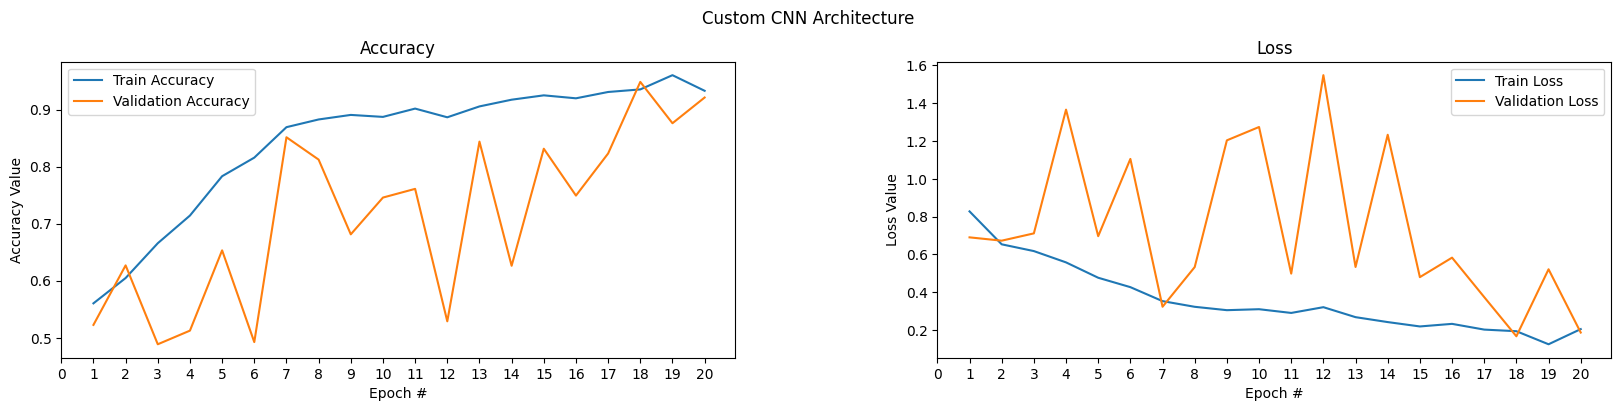

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
t = f.suptitle('Custom CNN Architecture ', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,EPOCHS+1))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, EPOCHS+1, 1))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch #')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, EPOCHS+1, 1))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch #')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model2.save('deepfake-detection-model1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
Y_train = tf.keras.utils.to_categorical(Y_train)


In [ ]:
Y_val = tf.keras.utils.to_categorical(Y_val)